# V827 Starfish results

Here we just spot check the config files to make sure the code has a good starting point.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd

## MCMC

What about the MCMC chains?

In [3]:
ws = np.load("../sf/V827Tau/m103/output/mix_emcee/run01/emcee_chain.npy")

In [4]:
max_obs = ws.any(axis=(0,2)).sum()

In [5]:
ws.shape

(40, 5000, 14)

In [6]:
max_obs

5000

In [7]:
burned = ws[:, -200:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [8]:
from matplotlib.ticker import MaxNLocator

In [9]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", '[Fe/H]',r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{eff}, 2}$", r"$\log{\Omega_2}$",
         r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

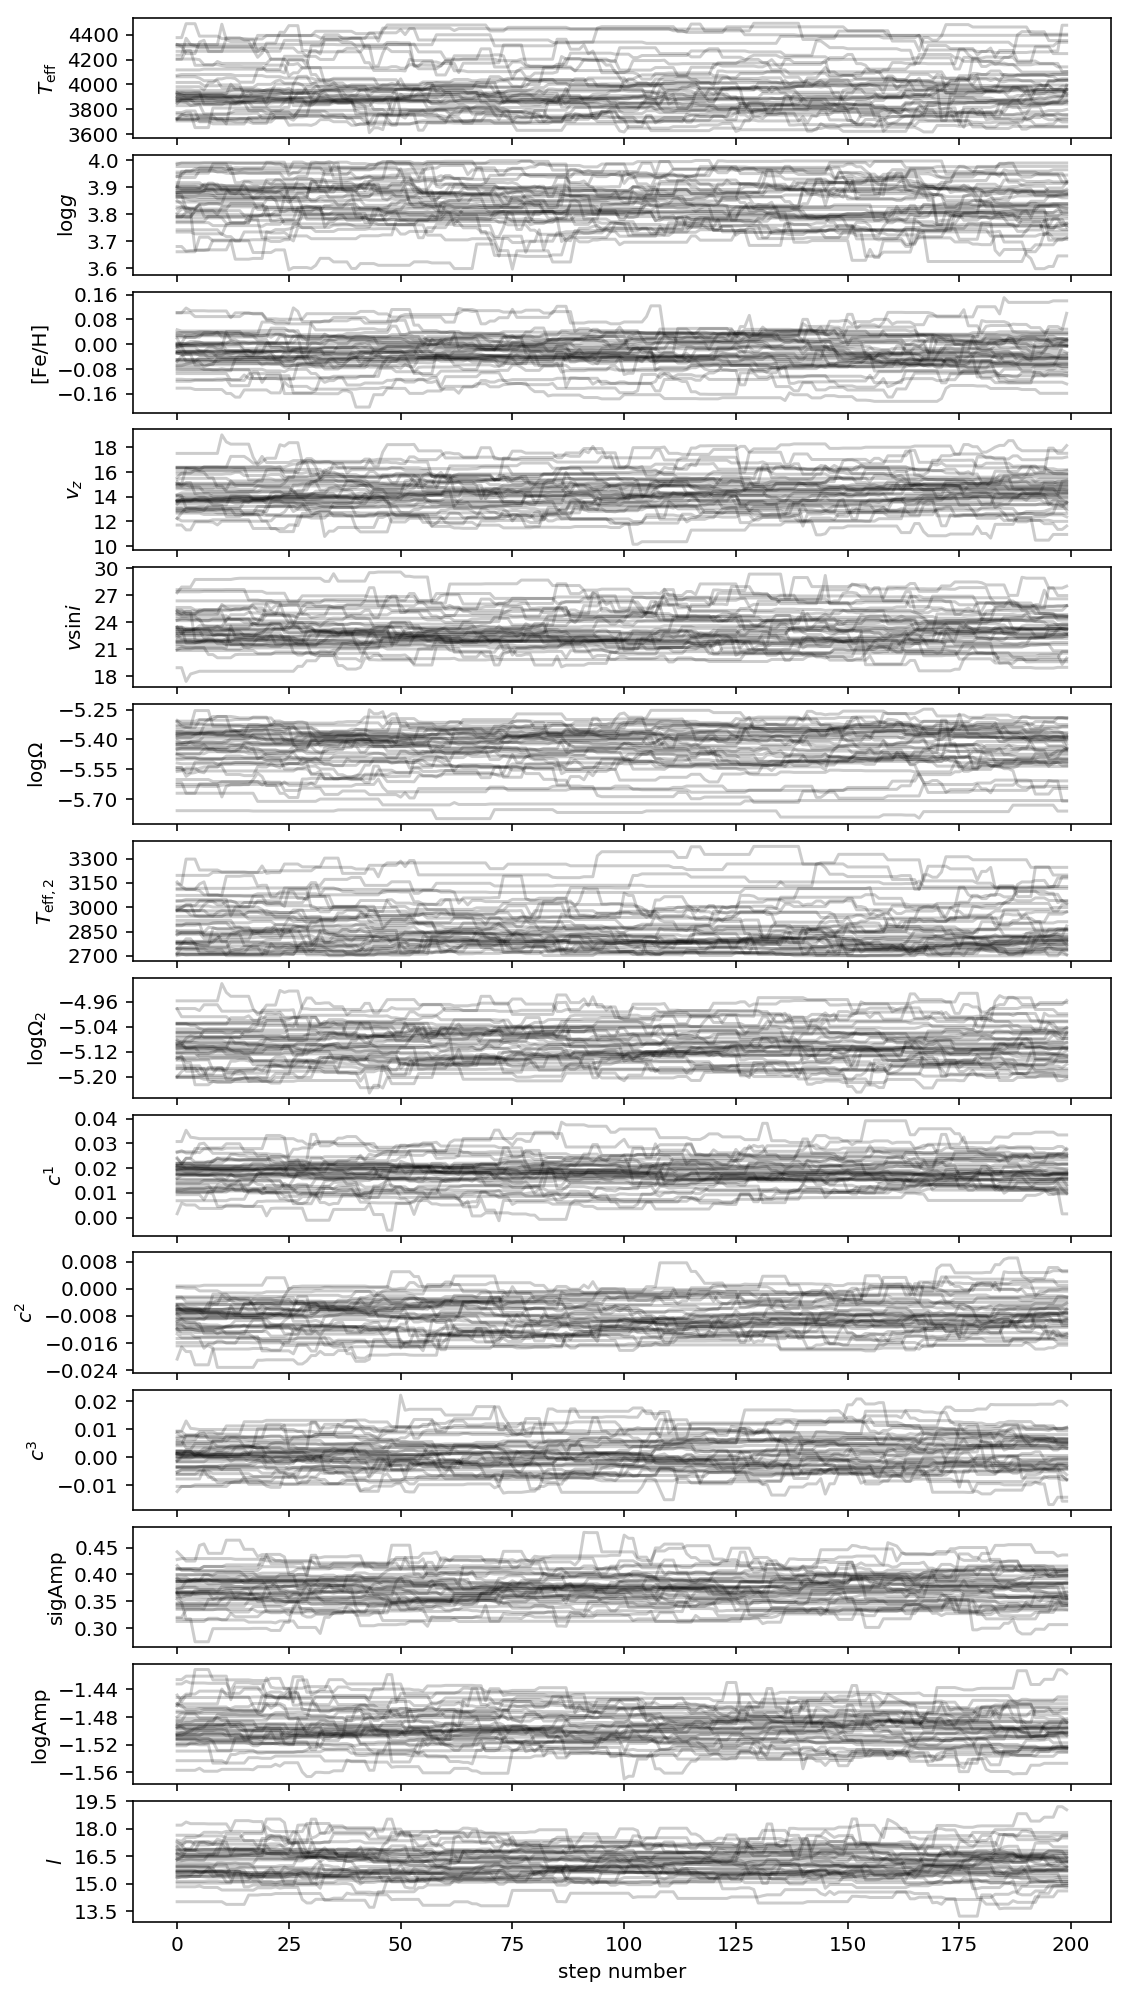

In [10]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(burned[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

What do those final 200 samples look like in spectra?

In [11]:
fc.shape

(8000, 14)

In [12]:
f_spot = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:, 7])
t_spot = fc[:, 6]

Let's get all of the orders from ACCRE

In [13]:
import os

In [14]:
path = '../sf/V827Tau/ACCRE/astro.phy.vanderbilt.edu/~somersge/AllRun02s/'
fns = os.listdir(path)

In [15]:
n_ords = len(fns)

In [16]:
fc_all = np.zeros([200*40, 14, n_ords])

In [24]:
m_orders = {fn:fn[1:4] for fn in fns}

In [27]:
from shutil import copyfile

In [33]:
sorted(list(m_orders.values()))

['101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123']

In [28]:
for i, fn in enumerate(fns):
    ws = np.load(path+fn)
    max_obs = ws.any(axis=(0,2)).sum()
    print(i, fn, max_obs)
    burned = ws[:, max_obs-200:max_obs,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    fc_all[:, :, i] = fc
    path2 = '../sf/V827Tau/m{}/output/mix_emcee/run01/'.format(m_orders[fn])
    copyfile(path+fn, path2+'/emcee_chain.npy')
    #print(path2)

0 m122_temp_emcee_chain.npy 5000
../sf/V827Tau/m122/output/mix_emcee/run01/
1 m115_temp_emcee_chain.npy 5000
../sf/V827Tau/m115/output/mix_emcee/run01/
2 m110_temp_emcee_chain.npy 4700
../sf/V827Tau/m110/output/mix_emcee/run01/
3 m102_temp_emcee_chain.npy 5000
../sf/V827Tau/m102/output/mix_emcee/run01/
4 m107_temp_emcee_chain.npy 5000
../sf/V827Tau/m107/output/mix_emcee/run01/
5 m108_temp_emcee_chain.npy 5000
../sf/V827Tau/m108/output/mix_emcee/run01/
6 m114_temp_emcee_chain.npy 5000
../sf/V827Tau/m114/output/mix_emcee/run01/
7 m123_temp_emcee_chain.npy 5000
../sf/V827Tau/m123/output/mix_emcee/run01/
8 m109_temp_emcee_chain.npy 5000
../sf/V827Tau/m109/output/mix_emcee/run01/
9 m103_temp_emcee_chain.npy 5000
../sf/V827Tau/m103/output/mix_emcee/run01/
10 m106_temp_emcee_chain.npy 4900
../sf/V827Tau/m106/output/mix_emcee/run01/
11 m105_temp_emcee_chain.npy 5000
../sf/V827Tau/m105/output/mix_emcee/run01/
12 m118_temp_emcee_chain.npy 5000
../sf/V827Tau/m118/output/mix_emcee/run01/
13 m120_t

In [162]:
i = 0
ws = np.load(path+fn)
max_obs = ws.any(axis=(0,2)).sum()
print(i, fn, max_obs)
burned = ws[:, max_obs-200:max_obs,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
fc_all[:, :, i] = fc

0 m119_temp_emcee_chain.npy 5000


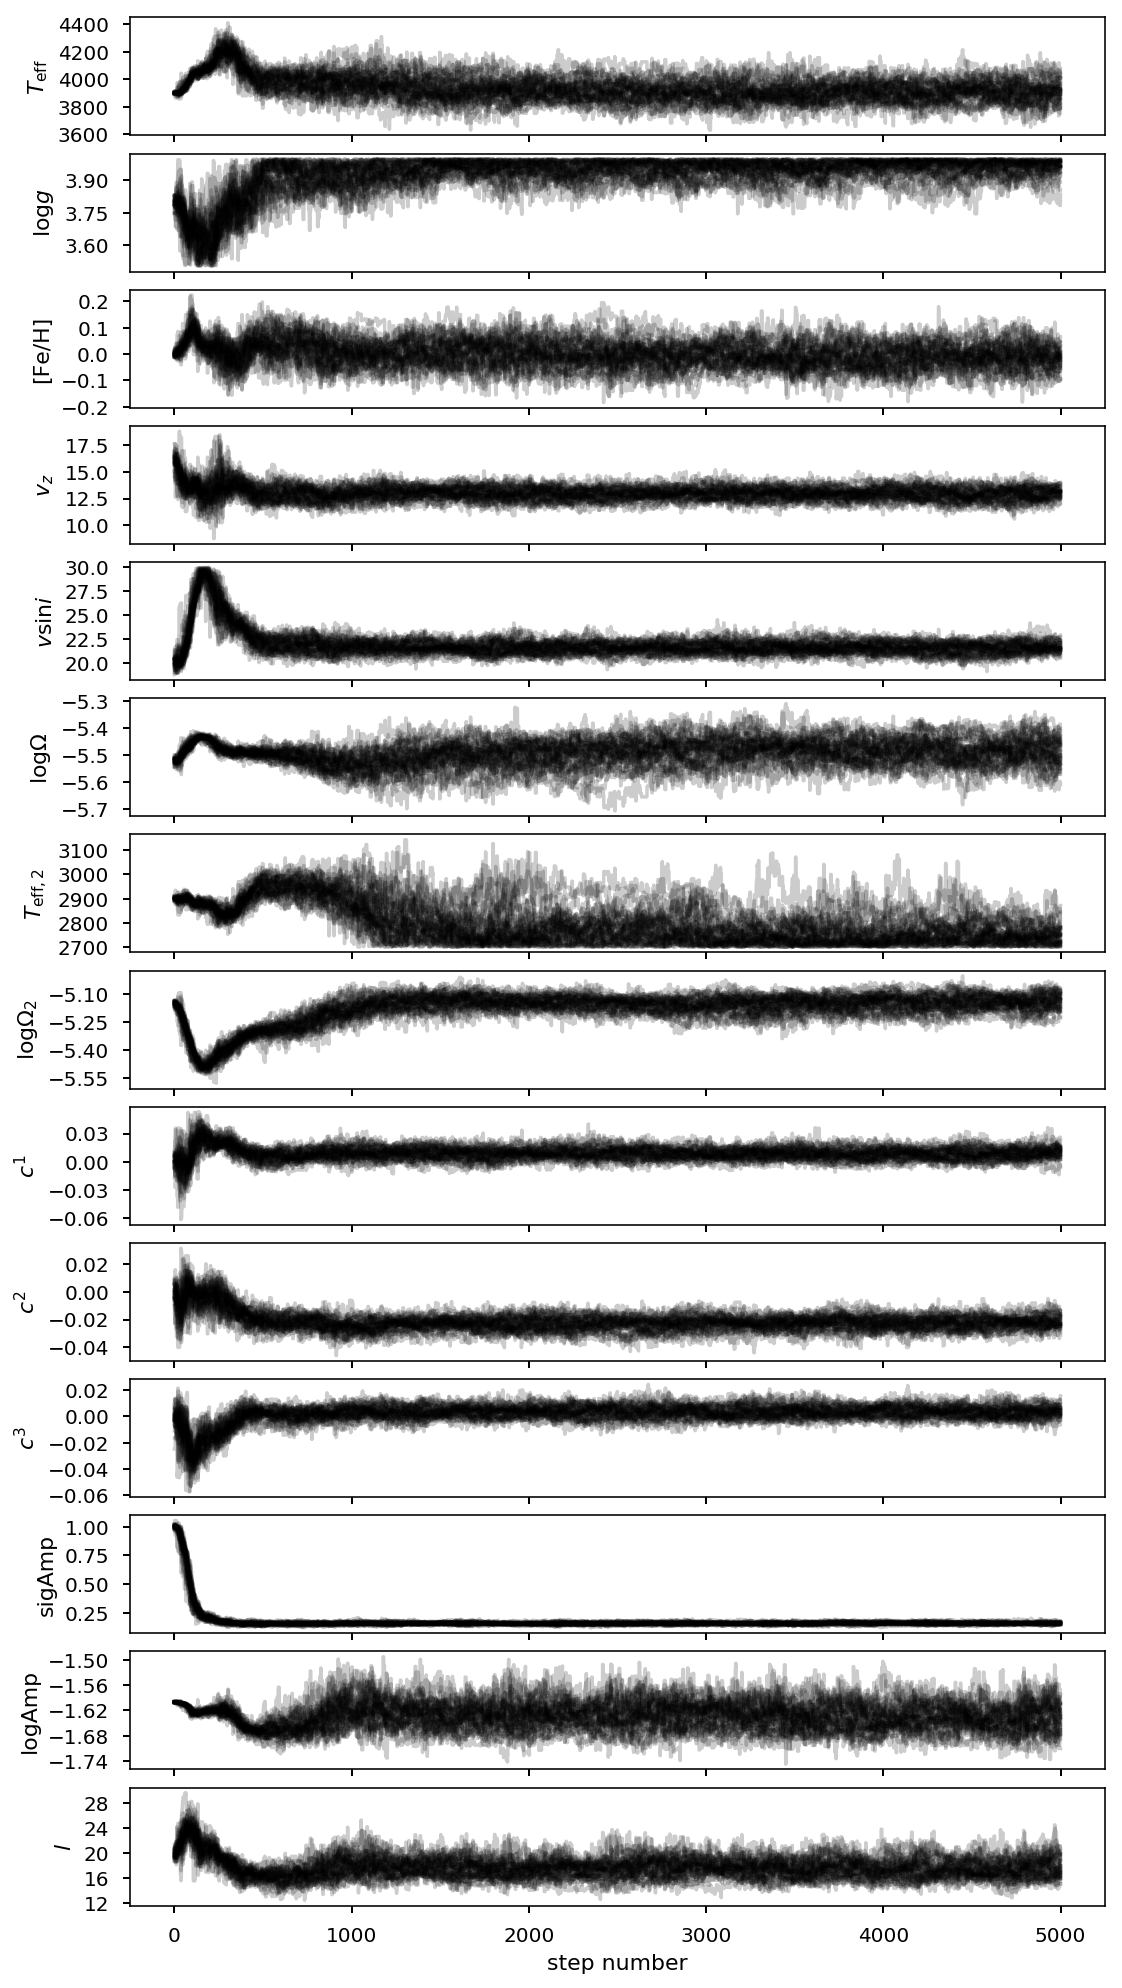

In [163]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

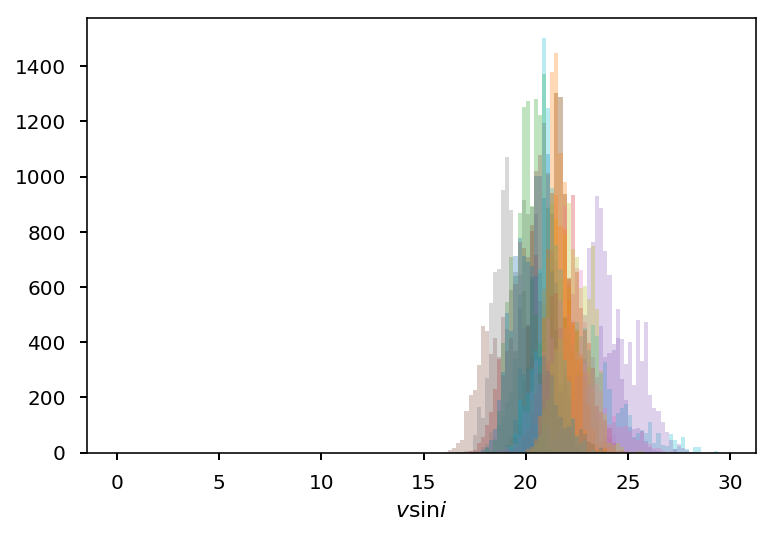

In [164]:
for i in range(n_ords):
    plt.hist(fc_all[:, 4, i], bins=np.arange(0, 30, 0.2), alpha=0.3);
plt.xlabel('$v\sin{i}$');

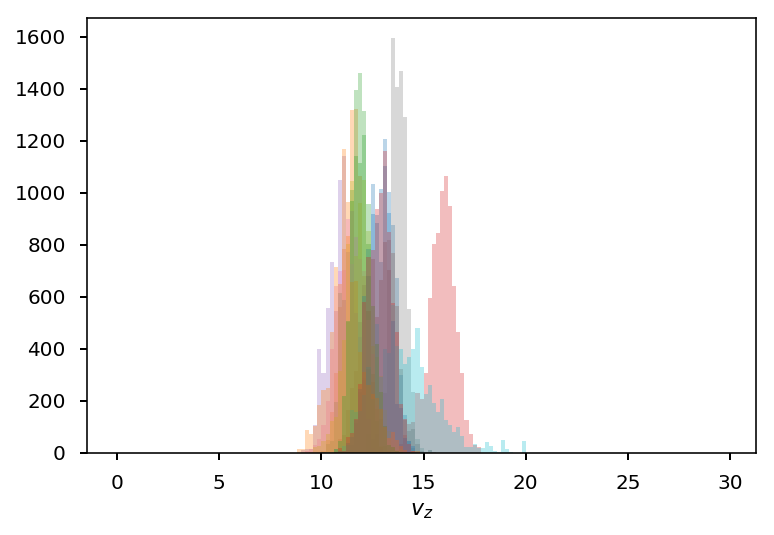

In [165]:
for i in range(14):
    plt.hist(fc_all[:, 3, i], bins=np.arange(0, 30, 0.2), alpha=0.3);
plt.xlabel('$v_z$');

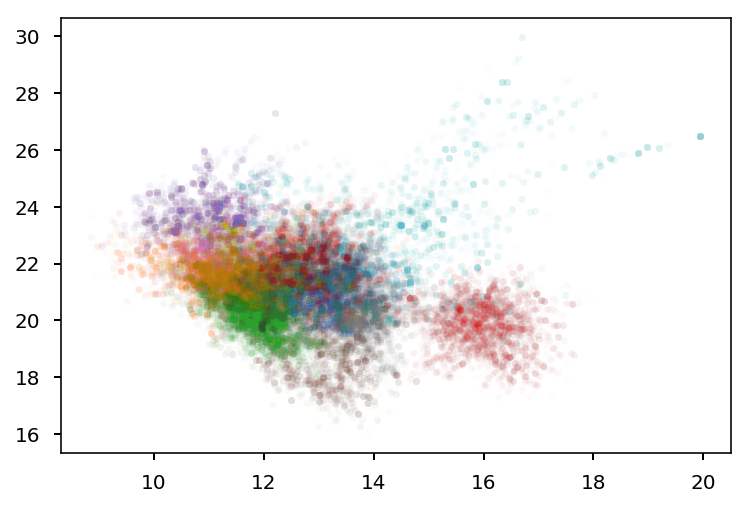

In [166]:
for i in range(14):
    plt.plot(fc_all[:, 3, i], fc_all[:, 4, i], '.',alpha=0.01);

In [167]:
import seaborn as sns

In [91]:
sns.set_context('notebook')

In [181]:
np.vstack((fc, fc)).shape

(16000, 14)

In [186]:
fc = fc_all[:, :, 0]
for i in range(1, n_ords):
    fc = np.vstack((fc,fc_all[:, :, i]))

In [187]:
fc.shape

(176000, 14)

In [203]:
f_spot_all = 10**fc_all[:, 7,:] / (10**fc_all[:, 5,:] + 10**fc_all[:, 7,:])
t_spot_all = fc_all[:, 6, :]

In [227]:
f_spot_med = np.median(f_spot_all, axis=0)
f_spot_med.shape

t_spot_med = np.median(t_spot_all, axis=0)
t_spot_med.shape

(22,)

In [228]:
f_spot_std = np.std(f_spot_all, axis=0)
t_spot_std = np.std(t_spot_all, axis=0)

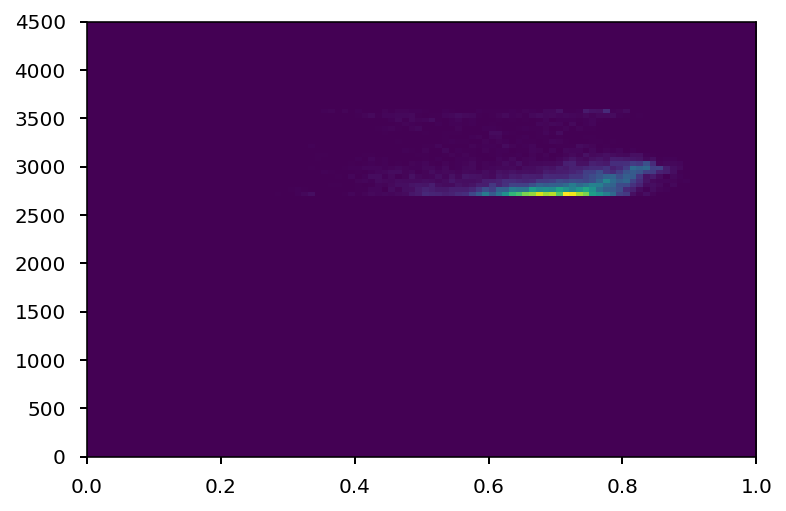

In [190]:
counts, xbins, ybins, Image = plt.hist2d(f_spot, t_spot, bins=100, range=[[0, 1], [0, 4500]])

''

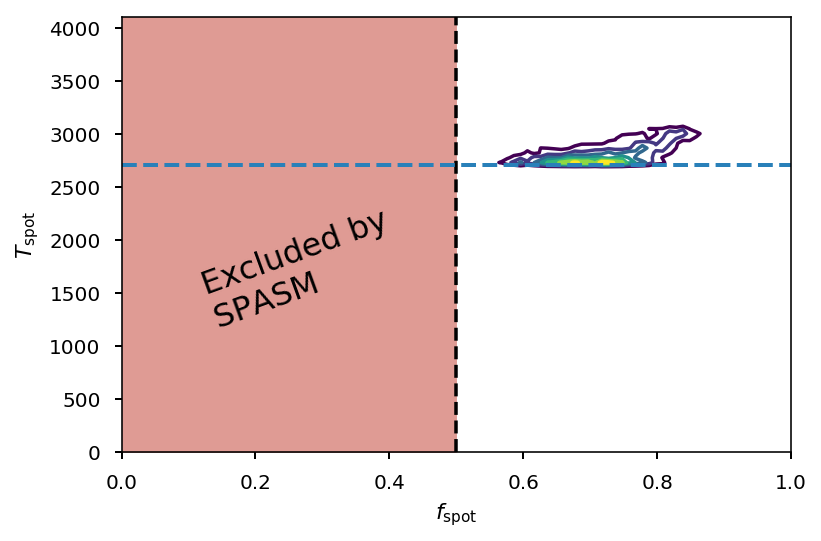

In [191]:
plt.figure(figsize=(6,4))
plt.contour(counts.T, extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()], origin=None)
plt.xlim(0, 1)
plt.ylim(0, 4100)
plt.xlabel('$f_\mathrm{spot}$')
plt.ylabel('$T_\mathrm{spot}$')
plt.axvline(0.5, linestyle='dashed', color='k')
#plt.axhline(4100, linestyle='dashed', color='#e74c3c')
plt.axhline(2700, linestyle='dashed', color='#2980b9', linewidth=2)
plt.fill_between([0, 0.5], [0,0], [4500, 4500], alpha=0.5, color='#c0392b')
#plt.fill_between([0, 1], [4100,4100], [4500, 4500], alpha=0.5, color='#e67e22')
plt.text(0.1, 1800, ' Excluded by \n SPASM', size=16, rotation=20)
;

In [215]:
alpha = 1/f_spot_std /60.0

In [216]:
alpha

array([0.36269772, 0.37684052, 0.33172274, 0.52903711, 0.13670378,
       0.28689167, 0.35893016, 0.88662167, 0.16379257, 0.19545199,
       0.28643519, 0.23409877, 0.57865841, 0.5412352 , 0.17675811,
       0.58318839, 0.48709703, 0.80086221, 0.26901139, 0.487144  ,
       0.58110314, 0.36269772])

In [226]:
t_spot_med

array([ 38.72228827,  78.35177458, 108.67276239,  50.66056038,
       253.97204051,  98.5300522 ,  41.35381135,  57.26915898,
        85.7081052 , 118.44447402, 109.12984324, 168.86688889,
        38.10976962,  36.373194  , 190.74715174,  53.51287236,
        84.71287127,  52.76507491, 129.25091289,  97.68203239,
        65.06543795,  38.72228827])

In [251]:
n_ords

22

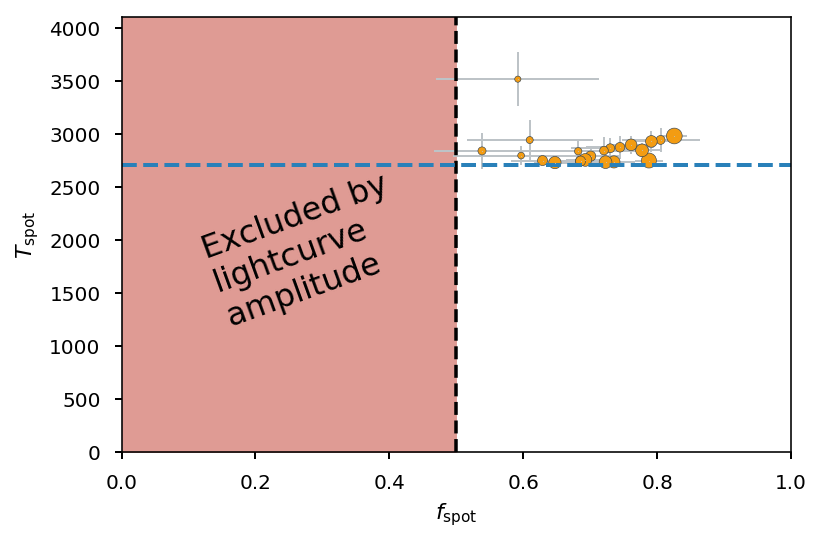

In [250]:
plt.figure(figsize=(6,4))
plt.errorbar(f_spot_med, t_spot_med, yerr=t_spot_std, xerr=f_spot_std, linewidth=1,
             color='#bdc3c7', fmt='.', ms=1)
plt.scatter(f_spot_med, t_spot_med, s=alpha*70, c='#f39c12', edgecolor='#2c3e50', zorder=2)
plt.xlim(0, 1)
plt.ylim(0, 4100)
plt.xlabel('$f_\mathrm{spot}$')
plt.ylabel('$T_\mathrm{spot}$')
plt.axvline(0.5, linestyle='dashed', color='k')
#plt.axhline(4100, linestyle='dashed', color='#e74c3c')
plt.axhline(2700, linestyle='dashed', color='#2980b9', linewidth=2)
plt.fill_between([0, 0.5], [0,0], [4500, 4500], alpha=0.5, color='#c0392b')
#plt.fill_between([0, 1], [4100,4100], [4500, 4500], alpha=0.5, color='#e67e22')
plt.text(0.1, 1800, ' Excluded by \n lightcurve \n amplitude', size=16, rotation=20)
plt.savefig('../document/figures/V827_Tau_Starfish_results.pdf', bbox_inches='tight')

Not bad!